In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import random

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")



# Generating Samples
x,y = make_classification(n_samples=10000,
                          n_features=2,
                          n_informative=2,
                          n_redundant= 0,
                          n_clusters_per_class=1, random_state=143)
# Stratified Sampling
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((7500, 2), (7500,)), ((2500, 2), (2500,)))

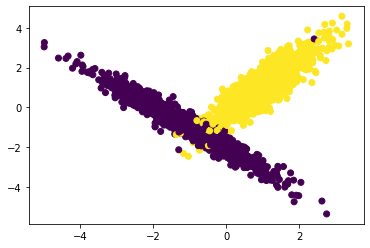

In [2]:
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

#### Decision Boundaries

In [3]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

> - ### Grid Search

In [4]:
def randomly_select_60_percent_indices_in_range_from_1_to_len(x_train):
    return random.sample(range(0, len(x_train)), int(0.6*len(x_train)))

def GridSearch(x_train, y_train, classifier, params, folds):
    trainscores = []
    testscores  = []    
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []
        for j in range(0, folds):
            # check this out: https://stackoverflow.com/a/9755548/4084039
            train_indices = randomly_select_60_percent_indices_in_range_from_1_to_len(x_train)
            test_indices  = list(set(list(range(1, len(x_train)))) - set(train_indices))

            # selecting the data points based on the train_indices and test_indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:10<00:00,  1.05it/s]


Accuracy of Model when K = 3 ---->> Train Accuracy = 98.59%   &&   Test Accuracy = 98.11999999999999%
Accuracy of Model when K = 5 ---->> Train Accuracy = 98.44000000000001%   &&   Test Accuracy = 98.31%
Accuracy of Model when K = 7 ---->> Train Accuracy = 98.19%   &&   Test Accuracy = 98.38%
Accuracy of Model when K = 9 ---->> Train Accuracy = 98.33%   &&   Test Accuracy = 98.22999999999999%
Accuracy of Model when K = 11 ---->> Train Accuracy = 98.22%   &&   Test Accuracy = 98.22999999999999%
Accuracy of Model when K = 13 ---->> Train Accuracy = 98.22999999999999%   &&   Test Accuracy = 98.42%
Accuracy of Model when K = 15 ---->> Train Accuracy = 98.41%   &&   Test Accuracy = 98.11%
Accuracy of Model when K = 17 ---->> Train Accuracy = 98.29%   &&   Test Accuracy = 98.2%
Accuracy of Model when K = 19 ---->> Train Accuracy = 98.14%   &&   Test Accuracy = 98.39%
Accuracy of Model when K = 21 ---->> Train Accuracy = 98.37%   &&   Test Accuracy = 98.06%
Accuracy of Model when K = 23 ---->

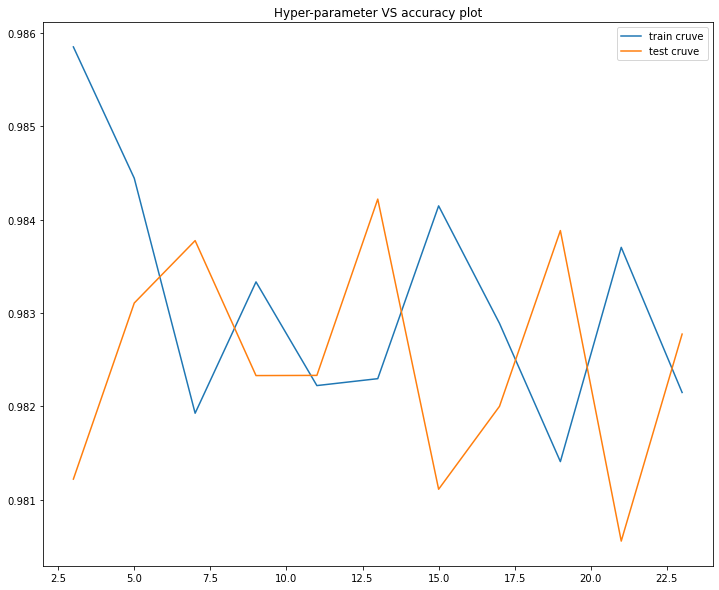

Best Nearest Neighbor : 13 which has an Testing Accuracy of 98.42%


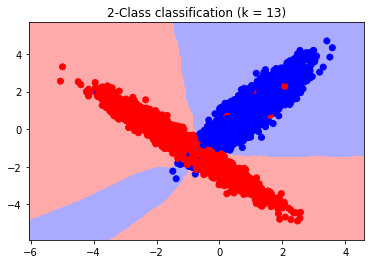

In [5]:
neigh = KNeighborsClassifier()

params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23]}
folds = 3

trainscores,testscores = GridSearch(X_train, y_train, neigh, params, folds)

score_dict = dict(zip(testscores, params['n_neighbors']))
best_score = score_dict[sorted(score_dict, reverse=True)[0]]
# https://stackoverflow.com/questions/8023306/get-key-by-value-in-dictionary
best_cv_acc = list(score_dict.keys())[list(score_dict.values()).index(best_score)]

for i in range(len(params['n_neighbors'])):
    print(f"Accuracy of Model when K = {params['n_neighbors'][i]} ---->> Train Accuracy = {round(trainscores[i],4)*100}%   &&   Test Accuracy = {round(testscores[i],4)*100}%")

plt.figure(figsize=(12,10))
plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

print(f"Best Nearest Neighbor : {best_score} which has an Testing Accuracy of {round(best_cv_acc,4)*100}%")


neigh = KNeighborsClassifier(n_neighbors = best_score)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

> - ### Randomized Search

In [6]:
def RandomSearchCV(X, Y, k, kfold): # Random SearchCV function
    train_acc, cv_acc, train_mean, cv_mean = [], [], [], []
    val = len(X)//kfold
    for K in k:
        for j in tqdm(range(kfold)):
            test_indices = list(set(list(range((val*j), (val*(j+1))))))
            train_indices = list(set(list(range(0, len(X)))) - set(test_indices))            
            
            X_train = X[train_indices]
            Y_train = Y[train_indices]
            X_cv  = X[test_indices]
            Y_cv  = Y[test_indices]
            
            knn = KNeighborsClassifier(n_neighbors = K) #Creating KNN object
            knn.fit(X_train, Y_train) #Fitting into KNN
            
            pred = knn.predict(X_train) #Predicting
            train_acc.append(accuracy_score(Y_train, pred)) #Appending accuracy into train_acc
            
            pred = knn.predict(X_cv) #Predicting
            cv_acc.append(accuracy_score(Y_cv, pred)) #Appending accuracy into cv_acc
            
        train_mean.append(np.mean(np.array(train_acc))) #Taking mean of accuracy
        cv_mean.append(np.mean(np.array(cv_acc))) #Taking mean of accuracy
        
    return train_mean, cv_mean #Return

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

[ 9 12 16 23 26 28 30 45 46 48]


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.64it/s]


Accuracy of Model when K = [ 9 12 16 23 26 28 30 45 46 48] ---->> Train Accuracy = 98.4%   &&   Test Accuracy = 98.2%
Accuracy of Model when K = [ 9 12 16 23 26 28 30 45 46 48] ---->> Train Accuracy = 98.36%   &&   Test Accuracy = 98.21%
Accuracy of Model when K = [ 9 12 16 23 26 28 30 45 46 48] ---->> Train Accuracy = 98.34%   &&   Test Accuracy = 98.22%
Accuracy of Model when K = [ 9 12 16 23 26 28 30 45 46 48] ---->> Train Accuracy = 98.33%   &&   Test Accuracy = 98.22999999999999%
Accuracy of Model when K = [ 9 12 16 23 26 28 30 45 46 48] ---->> Train Accuracy = 98.31%   &&   Test Accuracy = 98.24000000000001%
Accuracy of Model when K = [ 9 12 16 23 26 28 30 45 46 48] ---->> Train Accuracy = 98.29%   &&   Test Accuracy = 98.22999999999999%
Accuracy of Model when K = [ 9 12 16 23 26 28 30 45 46 48] ---->> Train Accuracy = 98.28%   &&   Test Accuracy = 98.22999999999999%
Accuracy of Model when K = [ 9 12 16 23 26 28 30 45 46 48] ---->> Train Accuracy = 98.27%   &&   Test Accuracy = 9

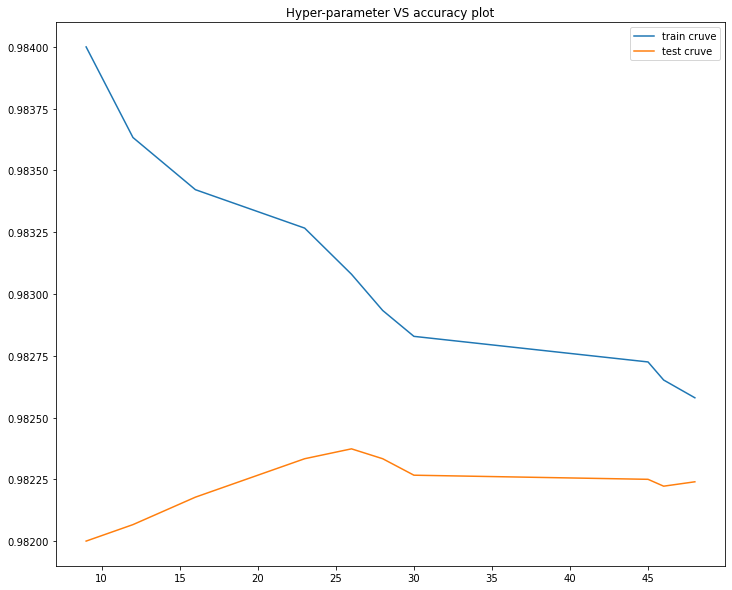

Best Nearest Neighbor : 26 which has an Testing Accuracy of 98.24000000000001%


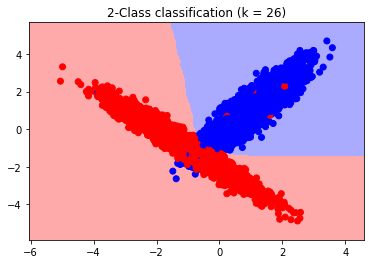

In [7]:
neigh = KNeighborsClassifier()

k = np.array(random.sample(range(1, 50), 10)) #Generating random 10 intergers
k.sort()
print(k)

folds = 3

trainscores,testscores = RandomSearchCV(X_train, y_train, k, folds)

score_dict = dict(zip(testscores, k))
best_score = score_dict[sorted(score_dict, reverse=True)[0]]
# https://stackoverflow.com/questions/8023306/get-key-by-value-in-dictionary
best_cv_acc = list(score_dict.keys())[list(score_dict.values()).index(best_score)]

for i in range(len(k)):
    print(f"Accuracy of Model when K = {k} ---->> Train Accuracy = {round(trainscores[i],4)*100}%   &&   Test Accuracy = {round(testscores[i],4)*100}%")

plt.figure(figsize=(12,10))
plt.plot(k,trainscores, label='train cruve')
plt.plot(k,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

print(f"Best Nearest Neighbor : {best_score} which has an Testing Accuracy of {round(best_cv_acc,4)*100}%")


neigh = KNeighborsClassifier(n_neighbors = best_score)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)